# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("US_Baby_Names.csv")

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [3]:
df.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### 03. Cho biết kích thước dữ liệu

In [4]:
m, n = df.shape[0], df.shape[1]
print(f'Kich thuoc cua du lieu la : ({m} x {n})')

Kich thuoc cua du lieu la : (1016395 x 7)


### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [5]:
df = df.drop(["Unnamed: 0", "Id"], axis=1)
df

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### 05. Cho biết số lượng bé trai, bé gái?

In [6]:
Boy_n_girl = df[["Gender", "Count"]].groupby("Gender").sum()

Boys = Boy_n_girl["Count"]["M"]
Girls = Boy_n_girl["Count"]["F"]

print(f'So luong be trai la : {Boys:_}')
print(f'So luong be gai la : {Girls:_}')

So luong be trai la : 19_041_199
So luong be gai la : 16_380_293


### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [7]:
KhacNhau = df.Name.nunique()

print(f'So luong ten unique : {KhacNhau:_}')

So luong ten unique : 17_632


### 07. Tên nào xuất hiện ít nhất?

In [8]:
df[["Name", "Count"]].groupby("Name").sum()["Count"].nsmallest(5)

Name
Aadarsh    5
Aadin      5
Aaima      5
Aalaya     5
Aaminah    5
Name: Count, dtype: int64


### 08. Top 10 tên được sử dụng nhiều nhất?

In [9]:
top10 = df[["Name", "Count"]].groupby("Name").sum()["Count"].nlargest(10)

for i, n in enumerate(top10):
    print(f"{i:02} : {n:_}")

00 : 242_874
01 : 214_852
02 : 214_405
03 : 209_277
04 : 204_798
05 : 197_894
06 : 191_551
07 : 191_446
08 : 191_440
09 : 190_318


## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

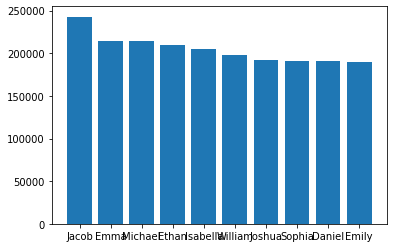

In [10]:
y = top10
x = top10.index
plt.bar(x, y)
plt.show()

<AxesSubplot:xlabel='Name', ylabel='Count'>

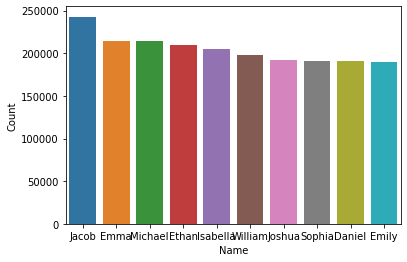

In [11]:
sns.barplot(x=x, y=y)

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

In [12]:
cau10 = df.groupby(["Year", "Gender"]).sum()["Count"]
years = [i for i in range(2004, 2014+1)]
rate = [cau10[i]["M"]/cau10[i]["F"] for i in range(2004, 2014+1)]

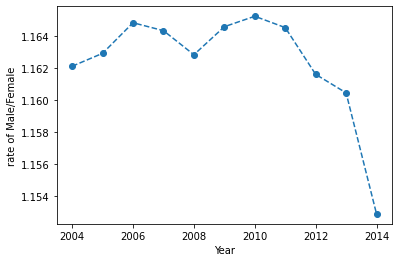

In [13]:
TITLE = "Bieu do ty le nam nu qua cac nam 2004-2014"
plt.plot(years, rate, label=TITLE, marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("rate of Male/Female")
plt.show()